In [14]:
import pandas as pd
import matplotlib as plt

In [15]:
bf = pd.read_excel("Base Completa.xlsx")

In [16]:
bf.head(2)

,Marca temporal,Dirección de correo electrónico,1. Nombre,2. Nombre de la empresa,3. Telefono,4. Genero,2,6. Estado Civil,7. Nivel de formación,8. Actividad económica,...,44. Considera que la trayectoria de crecimiento de la empresa es un factor de sostenibilidad económica,45. Las mejoras en las condiciones de trabajo aumentan el ámbito de la productividad contribuyendo a la sostenibilidad empresarial,46. La empresa adopta iniciativas para promover una mayor responsabilidad ambiental,47. La empresa actualmente cuenta con personal que cumple las siguientes funciones,48. La empresa actualmente cuenta con los siguientes planes,49. La empresa ha experimentado crisis en los últimos 5 años,50. ¿Cómo manejaron la crisis más reciente en su empresa?,51. ¿Cuáles podrían ser los riesgos más altos que generan crisis en su empresa?,52. ¿Cuál de las siguientes prácticas de sostenibilidad usted implementaría en su empresa?,53. Desea agregar algún comentario adicional o expresar alguna opinión.
0,2022-09-08 15:43:15.324,gerencia@alquilartefincas.com,Daniel Rueda Astro,AlquilArte Fincas Villavicencio,3052989982,B. Masculino,47,A. Soltero (a),E. Pregrado,Agencia de Viajes y/o operador turístico,...,B. De acuerdo,B. De acuerdo,B. De acuerdo,E. Ninguna de las anteriores,B. Plan de emergencias,A. Si,C. Definitivamente representó un reto para nos...,"A. Crisis financiera, E. Daño a la reputación,...","C. Practicar la regla de 3Rs: reducir, recicla...",NO
1,2022-09-14 21:59:25.877,diegoalbertosabogal@gmail.com,Diego Alberto Sabogal Santander,Llanotur.com,3212629406,B. Masculino,39,C. Casado (a),E. Pregrado,Agencia de Viajes y/o operador turístico,...,B. De acuerdo,B. De acuerdo,B. De acuerdo,E. Ninguna de las anteriores,D. Ninguna de las anteriores,A. Si,E. La crisis podría habernos cerrado permanent...,"C. Pandemia, D. Perdida de servicios públicos,...","G. Gestión correcta y ahorro de los recursos, ...",Na


/var/folders/nq/jvyxm9_91rl_vm66d6nh5jxw0000gn/T/ipykernel_1213/1242337970.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


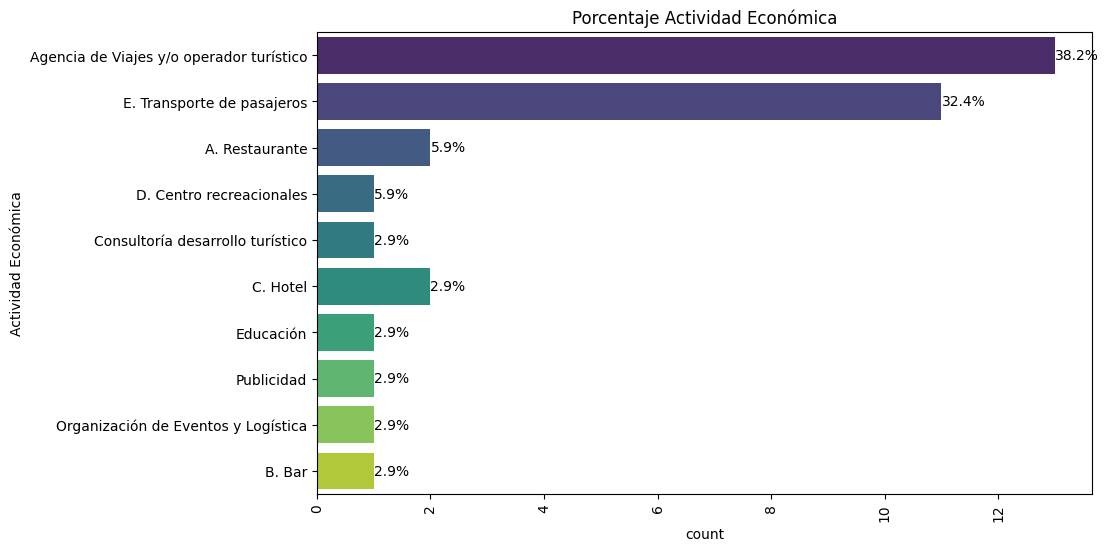

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

porcentajes = bf['8. Actividad económica'].value_counts(normalize=True) * 100

# Crea el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='8. Actividad económica', data=bf, palette='viridis')


# Añade los valores numéricos en la esquina derecha de cada barra
for idx, p in enumerate(ax.patches):
    valor_numerico = porcentajes.values[idx]
    x_pos = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate('{:.1f}%'.format(valor_numerico), (x_pos, y_pos), ha='left', va='center')


# Configura la orientación de las etiquetas en el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agrega un título al gráfico
plt.title('Porcentaje Actividad Económica')

# Etiqueta el eje vertical
plt.ylabel('Actividad Económica')
# Muestra el gráfico
plt.show()




In [18]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 55 columns):
 #   Column                                                                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                                                                              --------------  -----         
 0   Marca temporal                                                                                                                                                      34 non-null     datetime64[ns]
 1   Dirección de correo electrónico                                                                                                                                     34 non-null     object        
 2   1. Nombre                                                                                   

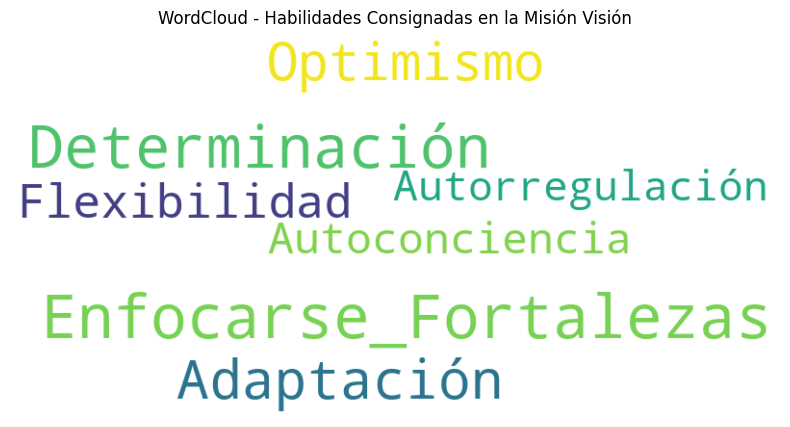

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Supongamos que tienes un DataFrame llamado bf con una columna específica
# Puedes ajustar esto según la estructura real de tu DataFrame

# Por ejemplo, si la columna es de tipo string con palabras separadas por espacios:
text_data = ' '.join(bf['13. ¿Cuáles de las siguientes habilidades están consignadas en la misión, visión, principios y objetivos de la empresa?'].dropna())

# Lista de palabras o letras que deseas eliminar
stop_words = ['A.', 'B.', 'C.', 'D.', 'A', 'B', 'C', 'D', 'F', 'E', 'G']

# Reemplaza "Ninguna de las anteriores" con una sola palabra
text_data = re.sub(r'\bEnfocarse en fortalezas\b', 'Enfocarse_Fortalezas', text_data)


# Elimina las palabras no deseadas
for stop_word in stop_words:
    text_data = re.sub(r'\b' + re.escape(stop_word) + r'\b', '', text_data)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Muestra el WordCloud usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Habilidades Consignadas en la Misión Visión')
plt.show()


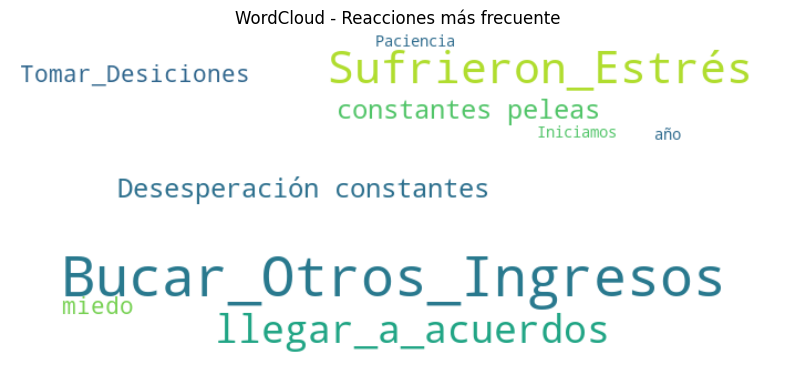

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Supongamos que tienes un DataFrame llamado bf con una columna específica
# Puedes ajustar esto según la estructura real de tu DataFrame

# Por ejemplo, si la columna es de tipo string con palabras separadas por espacios:
text_data = ' '.join(bf['15. ¿Cuáles fueron las reacciones más frecuentes que notó en el personal y colaboradores con la llegada de la crisis?'].dropna())

# Lista de palabras o letras que deseas eliminar
stop_words = ['A.', 'B.', 'C.', 'D.', 'A', 'B', 'C', 'D', 'F', 'E', 'G', 'y', 'el', 'en', 'basadas', 'este']

# Reemplaza "Ninguna de las anteriores" con una sola palabra
text_data = re.sub(r'\bBuscaron formas diferentes de conseguir ingresos\b', 'Bucar_Otros_Ingresos', text_data)
text_data = re.sub(r'\bSufrieron de estrés, angustia y bloqueo\b', 'Sufrieron_Estrés', text_data)
text_data = re.sub(r'\bHablaron con los clientes e intentaron llegar a nuevos acuerdos\b', 'llegar_a_acuerdos', text_data)
text_data = re.sub(r'\bTomaron decisiones\b', 'Tomar_Desiciones', text_data)




# Elimina las palabras no deseadas
for stop_word in stop_words:
    text_data = re.sub(r'\b' + re.escape(stop_word) + r'\b', '', text_data)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=700, height=300, background_color='white').generate(text_data)

# Muestra el WordCloud usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Reacciones más frecuente')
plt.show()

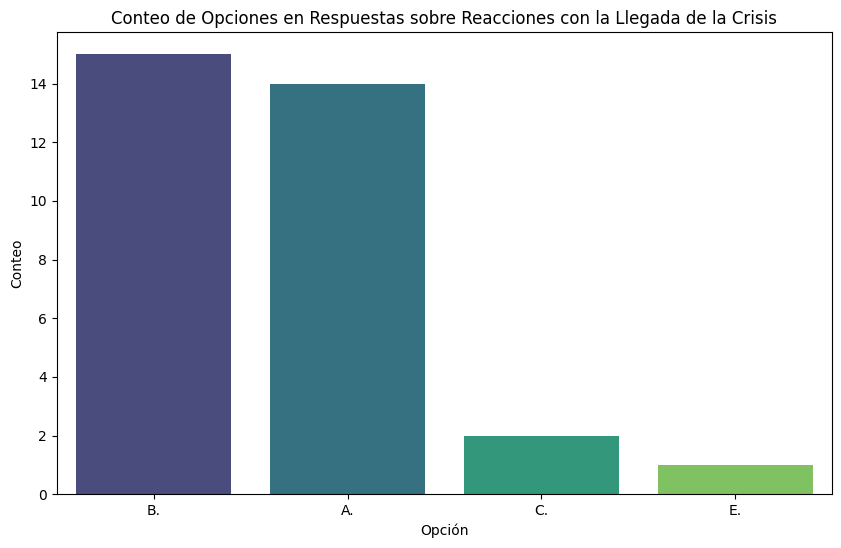

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado bf con una columna específica
# Puedes ajustar esto según la estructura real de tu DataFrame



# Extraer las opciones de las respuestas y contar su frecuencia
opciones = bf['15. ¿Cuáles fueron las reacciones más frecuentes que notó en el personal y colaboradores con la llegada de la crisis?'].str.extract(r'([A-Z]\.)')
conteo_opciones = opciones[0].value_counts().reset_index()
conteo_opciones.columns = ['Opción', 'Conteo']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Opción', y='Conteo', data=conteo_opciones, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Opción')
plt.ylabel('Conteo')
plt.title('Conteo de Opciones en Respuestas sobre Reacciones con la Llegada de la Crisis')

# Mostrar el gráfico
plt.show()



In [39]:
bf['22. ¿La empresa frente a las necesidades de cambio toma decisiones de forma ágil?'].value_counts()

B. Casi siempre      13
A. Siempre           13
C. Ocasionalmente     7
D. Casi nunca         1
Name: 22. ¿La empresa frente a las necesidades de cambio toma decisiones de forma ágil?, dtype: int64

In [49]:
# Supongamos que tu DataFrame se llama df
# Ajusta el nombre del DataFrame según el tuyo

# Obtén información para las columnas de la 10 a la 20
bf.iloc[:, 22:31].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                       --------------  ----- 
 0   21. ¿Cuáles de las siguientes prácticas de resiliencia usted implementaría en su empresa? (múltiple opción de respuesta)                                     34 non-null     object
 1   22. ¿La empresa frente a las necesidades de cambio toma decisiones de forma ágil?                                                                            34 non-null     object
 2   23. ¿Los problemas que enfrenta la empresa son de conocimiento general para los trabajadores?                                                            

In [73]:
import pandas as pd



# Lista de opciones posibles en las preguntas de escala Likert
opciones_likert = ['A. Siempre', 'B. Casi Siempre', 'C. Ocasionalmente', 'D. Casi Nunca', 'E. Nunca']

# Seleccionar columnas usando el método filter
columnas_seleccionadas = bf.filter(regex='^(22\.|23\.|24\.|26\.|27\.|28\.|29\.)')

# Inicializar el DataFrame de porcentajes con todas las opciones
porcentajes_df = pd.DataFrame(index=columnas_seleccionadas.columns, columns=opciones_likert).fillna(0)

# Calcular los porcentajes
for columna in columnas_seleccionadas.columns:
    porcentajes = columnas_seleccionadas[columna].value_counts(normalize=True) * 100
    # Llenar solo las opciones presentes en la columna actual
    porcentajes_df.loc[columna, porcentajes.index] = porcentajes.fillna(0)

# Mostrar el DataFrame de porcentajes
print(porcentajes_df)



                                                    A. Siempre  \
22. ¿La empresa frente a las necesidades de cam...   38.235294   
23. ¿Los problemas que enfrenta la empresa son ...   29.411765   
24. ¿Los líderes se preocupan por el bienestar ...   73.529412   
26. ¿La gerencia actúa estratégicamente ante la...   47.058824   
27. ¿Los líderes comunican a los colaboradores ...   55.882353   
28. ¿Las iniciativas de mejoras propuestas por ...   61.764706   
29. Con respecto a la pregunta anterior, en cas...   29.411765   

                                                    B. Casi Siempre  \
22. ¿La empresa frente a las necesidades de cam...         0.000000   
23. ¿Los problemas que enfrenta la empresa son ...        29.411765   
24. ¿Los líderes se preocupan por el bienestar ...         0.000000   
26. ¿La gerencia actúa estratégicamente ante la...         0.000000   
27. ¿Los líderes comunican a los colaboradores ...         0.000000   
28. ¿Las iniciativas de mejoras propuestas po

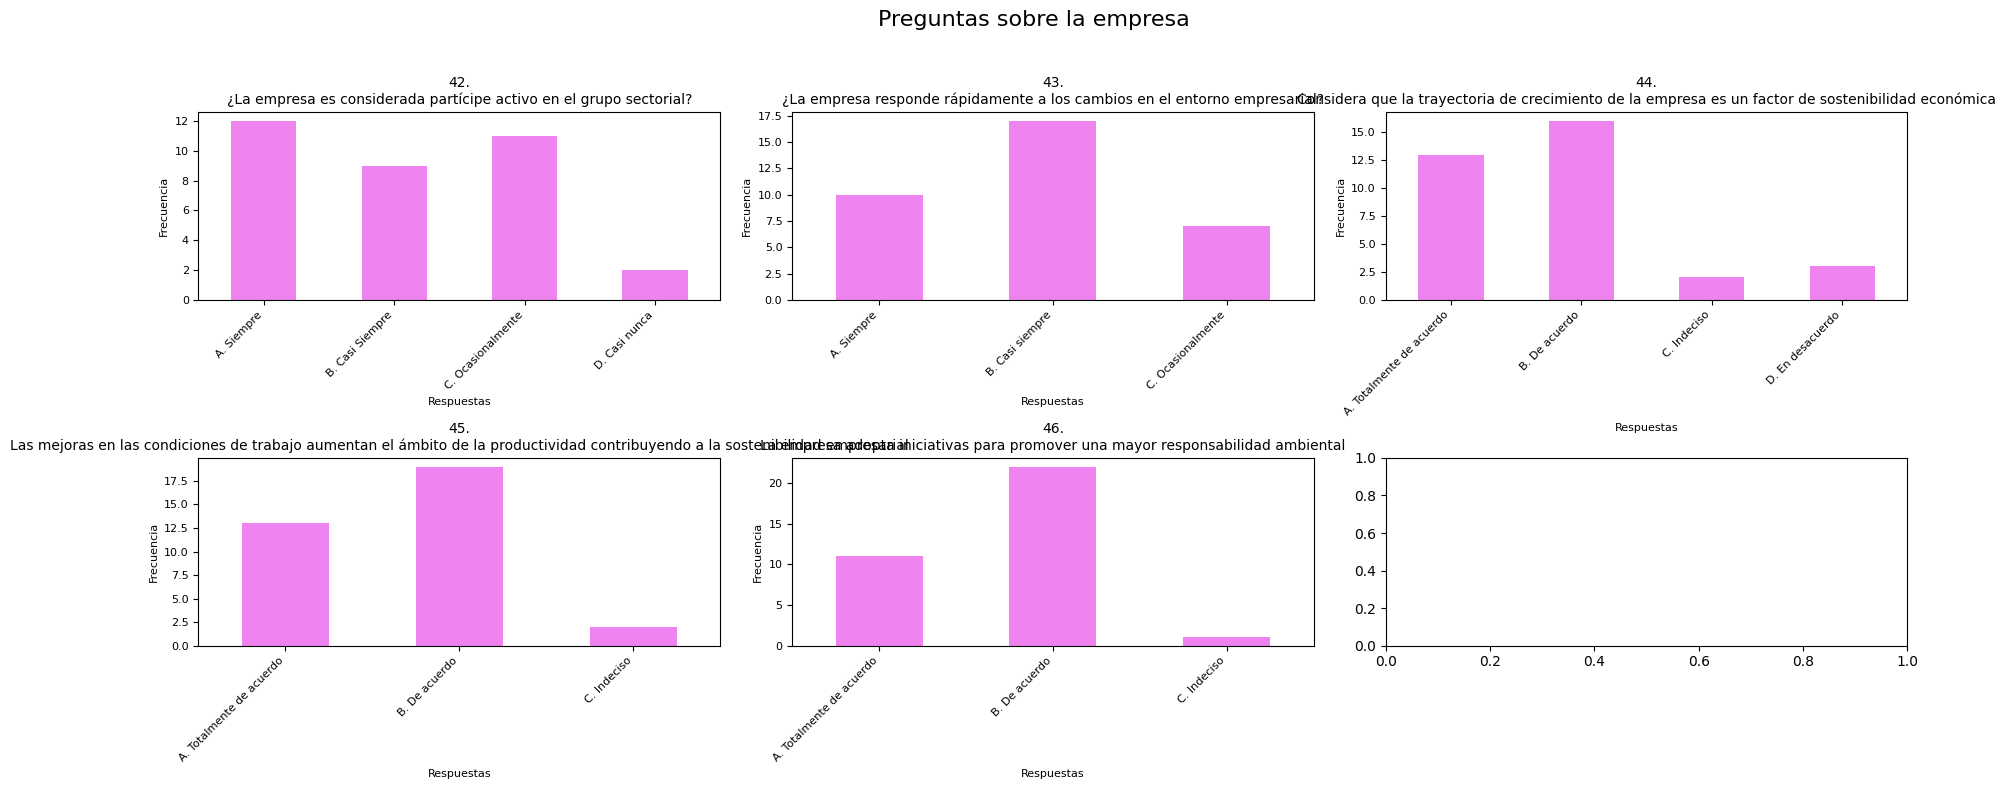

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar solo las primeras 5 columnas
columns_of_interest = [
    "42. ¿La empresa es considerada partícipe activo en el grupo sectorial?",
    "43. ¿La empresa responde rápidamente a los cambios en el entorno empresarial?",
    "44. Considera que la trayectoria de crecimiento de la empresa es un factor de sostenibilidad económica",
    "45. Las mejoras en las condiciones de trabajo aumentan el ámbito de la productividad contribuyendo a la sostenibilidad empresarial",
    "46. La empresa adopta iniciativas para promover una mayor responsabilidad ambiental"
]

bf_subset = bf[columns_of_interest]

# Crear dos filas de gráficos de barras
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.suptitle('Preguntas sobre la empresa', fontsize=16)

# Iterar sobre las columnas y crear un gráfico de barras para cada una
for i, column in enumerate(bf_subset.columns):
    if i < 5:
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        bf_subset[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='violet')
        title_lines = column.split(' ', 1)
        ax.set_title('\n'.join(title_lines), fontsize=10)  # Título en dos líneas
        ax.set_xlabel('Respuestas', fontsize=8)  # Ajusta el tamaño de la etiqueta del eje X
        ax.set_ylabel('Frecuencia', fontsize=8)  # Ajusta el tamaño de la etiqueta del eje Y
        ax.tick_params(axis='both', which='both', labelsize=8)  # Ajusta el tamaño de las etiquetas de los ejes
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Rota las etiquetas del eje X

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el espacio entre los gráficos y el título
plt.show()

In [19]:
bf['36. ¿Los procesos de la empresa son ágiles y flexibles?'].value_counts()

B. Casi siempre      21
A. Siempre           10
C. Ocasionalmente     2
D. Casi nunca         1
Name: 36. ¿Los procesos de la empresa son ágiles y flexibles?, dtype: int64

In [20]:
bf['37. ¿Con qué frecuencia la empresa crea alianzas con otras empresas para generar ventajas económicas, humanas y comerciales?.'].value_counts()

B. Frecuentemente        13
A. Muy frecuentemente    10
C. Ocasionalmente         6
D. Rara vez               3
E. Nunca                  2
Name: 37. ¿Con qué frecuencia la empresa crea alianzas con otras empresas para generar ventajas económicas, humanas y comerciales?., dtype: int64

In [21]:
bf['38. ¿La empresa supervisa de manera proactiva lo que está sucediendo dentro y fuera de la industria para obtener alertas tempranas a problemas emergentes?.'].value_counts()

B. Casi siempre      12
A. Siempre           10
C. Ocasionalmente     8
D. Casi nunca         3
E. Nunca              1
Name: 38. ¿La empresa supervisa de manera proactiva lo que está sucediendo dentro y fuera de la industria para obtener alertas tempranas a problemas emergentes?., dtype: int64

In [22]:
bf['39. Con qué frecuencia la empresa capacita a su personal en aspectos de calidad y mejoramiento continuo'].value_counts()

B. Frecuentemente        15
C. Ocasionalmente        10
A. Muy frecuentemente     5
D. Rara vez               4
Name: 39. Con qué frecuencia la empresa capacita a su personal en aspectos de calidad y mejoramiento continuo, dtype: int64

In [26]:
df = pd.read_excel("Base_Completa.xlsx")

In [29]:
bf.head(1)

,Marcatemporal,Nombre,Empresa,Genero,Edad,EstadoCivil,Formación,Actividad_económica,Tipo_organización,Número_de_trabajadores,...,Variable_29,Variable_36,Variable_37,Variable_38,Variable_39,Variable_16,Variable_17,Variable_31,Variable_32,Variable_33
0,2022-09-08 15:43:15.324,Daniel Rueda Astro,AlquilArte Fincas Villavicencio,Masculino,47,Soltero,Pregrado,Agencia de Viajes y/o operador turístico,Persona natural,≤ a 10 trabajadores,...,2,2,1,2,1,4,3,3,9,2


In [36]:
import numpy as np
import pandas as pd

# Supongamos que 'df' es tu DataFrame
respuestas = df[['Variable_36', 'Variable_37', 'Variable_38', 'Variable_39']].values

# Calcula el índice de Kuder-Richardson 20
def kr20(respuestas):
    total_items = respuestas.shape[1]
    suma_varianzas = 0

    for i in range(total_items):
        varianza_i = np.var(respuestas[:, i])  # Accede directamente a la columna i
        suma_varianzas += varianza_i

    kr20 = (total_items / (total_items - 1)) * (1 - (suma_varianzas / np.var(respuestas.sum(axis=1))))
    return kr20

# Imprime el resultado
print("KR-20:", kr20(respuestas))


KR-20: -0.05347808604744634


In [30]:
respuestas

,Variable_36,Variable_37,Variable_38,Variable_39
0,2,1,2,1
1,2,2,1,1
2,2,1,2,3
3,2,1,5,2
4,3,5,2,1
5,2,3,3,3
6,2,2,4,3
7,1,3,1,4
8,4,1,5,1
9,2,1,4,3


In [35]:
for i in respuestas['Variable_39']:
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
